In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
reviews=df.columns[0]
sentiments=df.columns[1]

In [9]:
df[sentiments].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df[sentiments].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [12]:
max_features=5000
tfidf=TfidfVectorizer(max_features=max_features)
tfidfvec=tfidf.fit_transform(df[reviews]).toarray()
tfidfvec.shape

(49582, 5000)

In [13]:
label_encoder=LabelEncoder()
encoded_sentiments=label_encoder.fit_transform(df[sentiments])
encoded_sentiments.shape

(49582,)

In [14]:
x=tfidfvec
y=encoded_sentiments

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [16]:
x_train.shape,y_train.shape

((39665, 5000), (39665,))

In [17]:
x_test.shape,y_test.shape

((9917, 5000), (9917,))

In [18]:
input_shape=(max_features, )
layer_1_units=256
layer_2_units=256
output_layer_units=1

In [19]:
model=Sequential([
    Input(shape=input_shape),
    Dense(units=layer_1_units, activation='relu'),
    Dense(units=layer_2_units, activation='relu'),
    Dense(units=output_layer_units, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,346,305 (5.14 MB)

 Trainable params: 1,346,305 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history=model.fit(x_train,y_train,epochs=5, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8417 - loss: 0.3639 - val_accuracy: 0.8887 - val_loss: 0.2638
Epoch 2/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9198 - loss: 0.2020 - val_accuracy: 0.8852 - val_loss: 0.2817
Epoch 3/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9566 - loss: 0.1180 - val_accuracy: 0.8801 - val_loss: 0.3344
Epoch 4/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9898 - loss: 0.0308 - val_accuracy: 0.8768 - val_loss: 0.5853
Epoch 5/5
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.8793 - val_loss: 0.8249


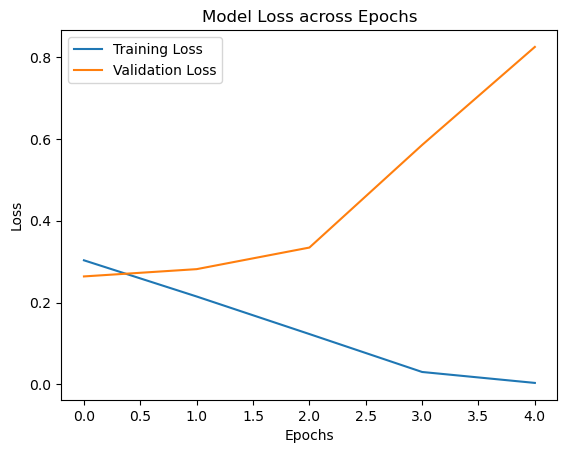

In [22]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss across Epochs')
plt.legend()
plt.show()

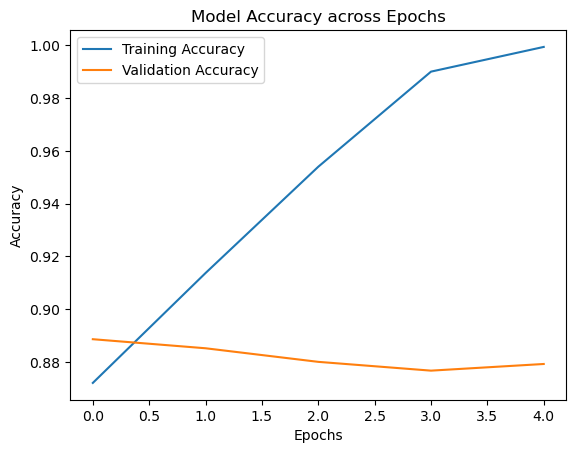

In [23]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy across Epochs')
plt.legend()
plt.show()

In [24]:
y_pred_probs=model.predict(x_test)
y_pred=(y_pred_probs>0.5).astype('int32')

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

Accuracy  : 0.8793
Precision : 0.8798
Recall    : 0.8796
F1 Score  : 0.8797


In [26]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4940
           1       0.88      0.88      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



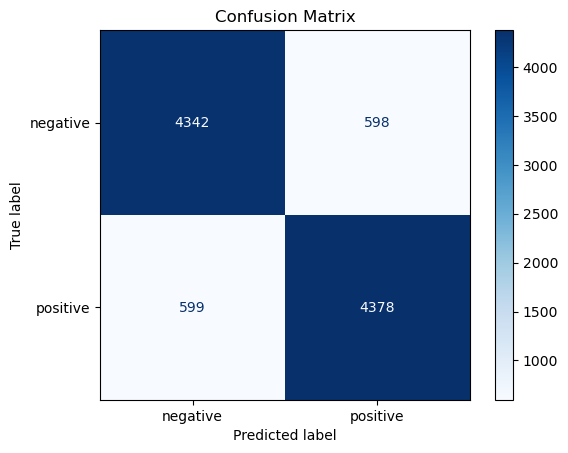

In [27]:
cm=confusion_matrix(y_test,y_pred)
conf=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
conf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()